In [1]:
# Importing lib/Packages
import numpy as np
import pandas as pd

In [2]:
#Import dataset
dataset = pd.read_csv("SMSSpamCollection",sep = '\t', names=['label', 'message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['label'] = dataset['label'].map({'ham' : 0,'spam': 1})

In [8]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

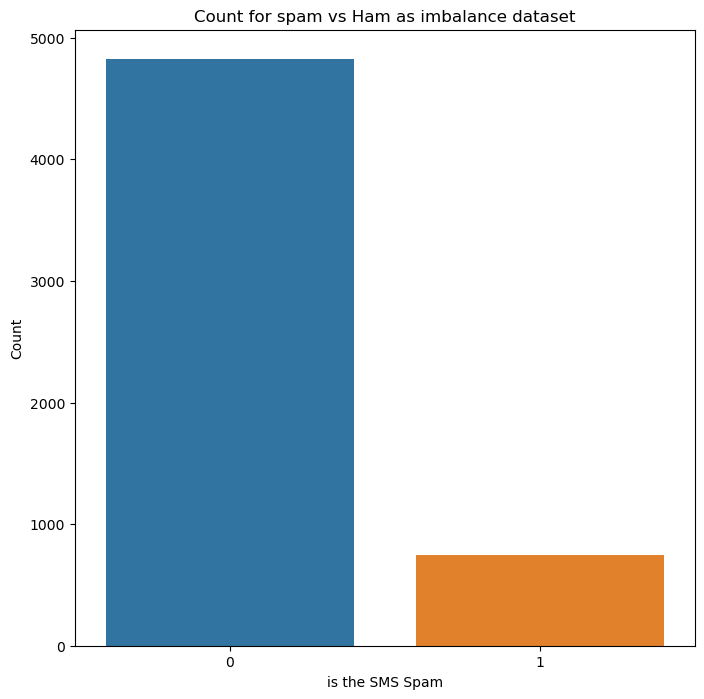

In [10]:
# Countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label", data=dataset)
p = plt.title('Count for spam vs Ham as imbalance dataset')
p = plt.xlabel('is the SMS Spam')
p = plt.ylabel('Count')

In [11]:
#Handling imbalanced dataset using Oversumpting
only_spam = dataset[dataset["label"] == 1]

In [12]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [13]:
print('No of Spam SMS :', len(only_spam))
print('No of Ham SMS :', len(dataset) - len(only_spam))

No of Spam SMS : 747
No of Ham SMS : 4825


In [14]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [15]:
count

6

In [16]:
for i in range(0, count-1):
    dataset = pd.concat([dataset, only_spam])
    
dataset.shape

(9307, 2)

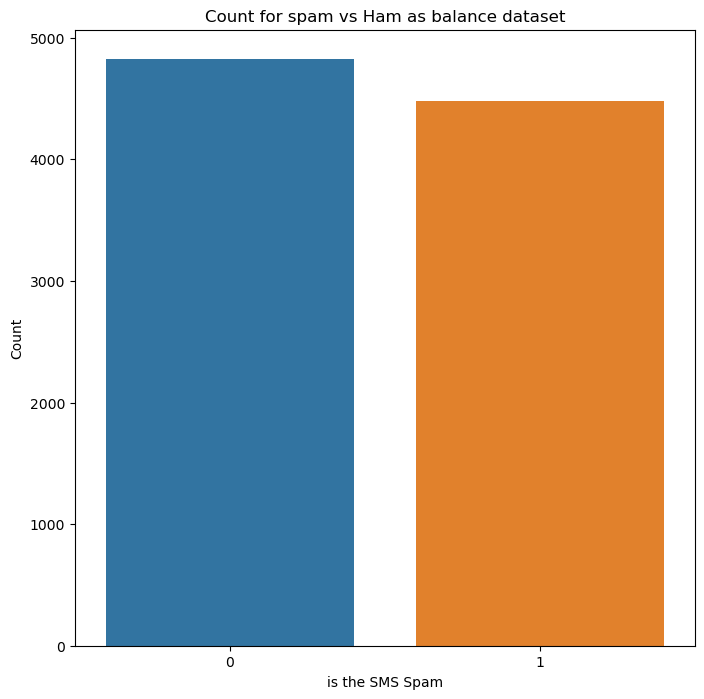

In [17]:
# Countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x="label", data=dataset)
p = plt.title('Count for spam vs Ham as balance dataset')
p = plt.xlabel('is the SMS Spam')
p = plt.ylabel('Count')

In [18]:
#Creating new feature word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [19]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


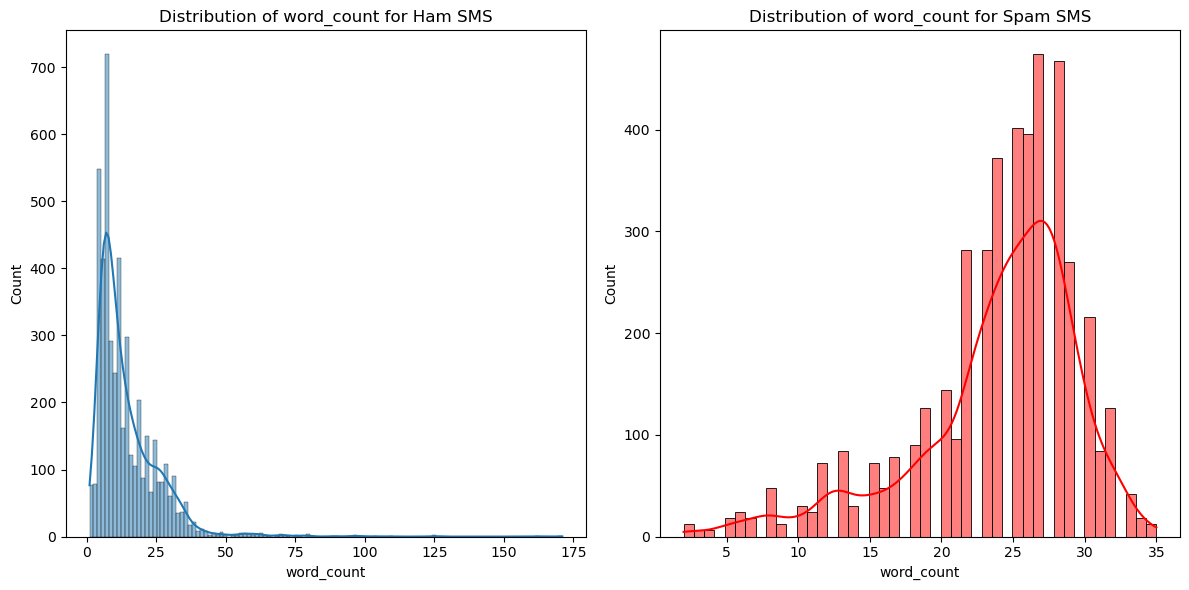

In [20]:
plt.figure(figsize=(12,6))

# (1,1)
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count,kde = True)
p = plt.title('Distribution of word_count for Ham SMS')

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, color = "red" ,kde = True)
p = plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [21]:
#Creating new feature of containing currency symbols
def currency(data):
    currency_symbols = ['€', ' $', '¥', '£', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [22]:
dataset["contains_currency_symbols"] = dataset["message"].apply(currency)

In [23]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


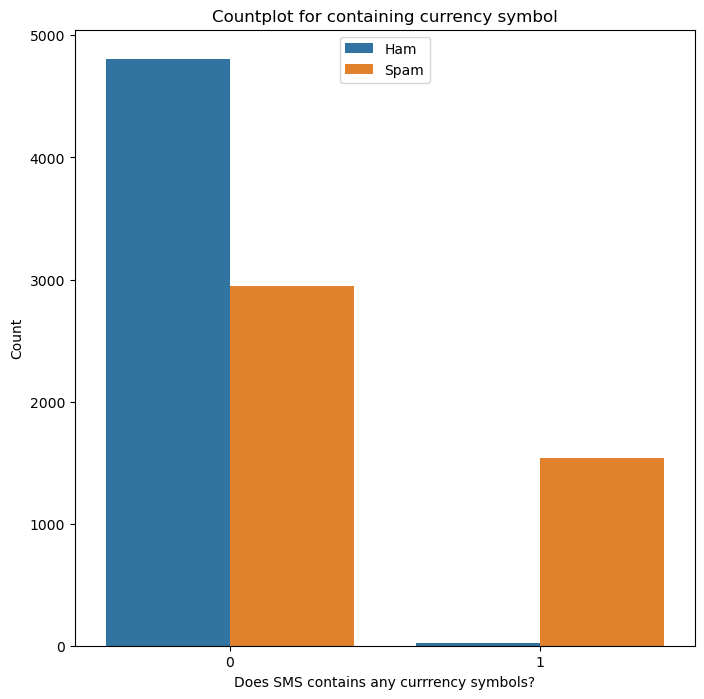

In [24]:
# Countplot for contains_currency_symbols
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_currency_symbols', data = dataset, hue = "label")
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel('Does SMS contains any currrency symbols?')
p = plt.ylabel('Count')
p = plt.legend(labels=["Ham","Spam"], loc = 9)

In [25]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [26]:
dataset["contains_number"] = dataset["message"].apply(number)

In [27]:
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


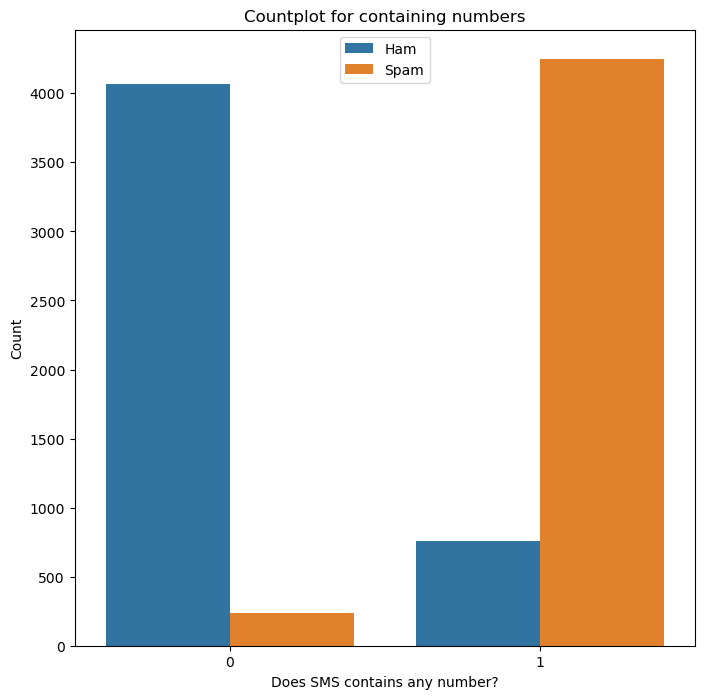

In [28]:
# Countplot for containing numbers
plt.figure(figsize=(8,8))
g = sns.countplot(x = 'contains_number', data = dataset, hue = "label")
p = plt.title('Countplot for containing numbers')
p = plt.xlabel('Does SMS contains any number?')
p = plt.ylabel('Count')
p = plt.legend(labels=["Ham","Spam"], loc = 9)

In [29]:
# Data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Durga
[nltk_data]     sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Durga
[nltk_data]     sai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Durga
[nltk_data]     sai\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
corpus = []

wnl = WordNetLemmatizer()
for sns in list(dataset.message):
    message = re.sub(pattern = '[^a-zA-Z]', repl='', string=sns) # Filtering out specialcharacters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    
    corpus.append(message)

In [31]:
corpus

['gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat',
 'oklarjokingwifuoni',
 'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers',
 'udunsaysoearlyhorucalreadythensay',
 'nahidontthinkhegoestousfhelivesaroundherethough',
 'freemsgheytheredarlingitsbeenweeksnowandnowordbackidlikesomefunyouupforitstilltbokxxxstdchgstosendtorcv',
 'evenmybrotherisnotliketospeakwithmetheytreatmelikeaidspatent',
 'asperyourrequestmellemelleoruminnaminungintenurunguvettamhasbeensetasyourcallertuneforallcallerspresstocopyyourfriendscallertune',
 'winnerasavaluednetworkcustomeryouhavebeenselectedtoreceiveaprizerewardtoclaimcallclaimcodeklvalidhoursonly',
 'hadyourmobilemonthsormoreurentitledtoupdatetothelatestcolourmobileswithcameraforfreecallthemobileupdatecofreeon',
 'imgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkivecriedenoughtoday',
 'sixchancestowincashfromtopoundstxtcshandsendtocostpdaydaystsandcsapplyrepl

In [32]:
# creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [33]:
X = pd.DataFrame(vectors,columns = feature_names)
y = dataset['label']

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42)

In [36]:
X_test

,anetworksallowcompaniestobillforsmssotheyareresponsiblefortheirsuppliersjustasashophastogiveaguaranteeonwhattheysellbg,areyouuniqueenoughfindoutfromthaugustwwwareyouuniquecouk,asaregisteredoptinsubscriberurdrawgiftvoucherwillbeenteredonreceiptofacorrectanstowhatsnointhebbccharts,asaregisteredsubscriberyrdrawagiftvoucherwillbenteredonreceiptofacorrectanswhenarethenextolympicstxtansto,asasimsubscriberyouareselectedtoreceiveabonusgetitdeliveredtoyourdoortxtthewordoktonotoclaimpmsgexpapr,asavaluedcustomeriampleasedtoadviseyouthatfollowingrecentreviewofyourmobnoyouareawardedwithabonusprizecall,asoneofourregisteredsubscribersucanenterthedrawagbgiftvoucherbyreplyingwithentertounsubscribetextstop,auctionroundthehighestbidisnownextmaximumbidistobidsendbidsegtobidtogoodluck,axmasrewardiswaitingforyouourcomputerhasrandomlypickedyoufromourloyalmobilecustomerstoreceivearewardjustcall,babeuwantmedontubabyimnastyandhaveathingfilthyguysfancyarudetimewithasexybitchhowaboutwegoslonhardtxtxxxslomsgs,...,youhavenewmessagepleasecall,youhavenewvoicemailpleasecall,youhavewonaguaranteedcashoraprizetoclaimyrprizecallourcustomerservicerepresentativeonbetweenampmcostp,youhavewonanokiaithisiswhatyougetwhenyouwinourfreeauctiontotakepartsendnokiatonowhgsuitelandsrowwjhl,youhavewonasavaluedvodafonecustomerourcomputerhaspickedyoutowinaprizetocollectiseasyjustcall,yourchancetobeonarealityfantasyshowcallnowjustpperminnttltdpoboxcroydoncrwbisanationalratecall,yourfreeringtoneiswaitingtobecollectedsimplytextthepasswordmixtotoverifygetusherandbritneyfmlpoboxmkhppw,youvewontktstotheeurocupfinalorcashtocollectcallbpoboxppm,youvewonyourcostadelsolholidayorawaitcollectioncallnowtoclaimsaetcspoboxstockportskxhcostpmmaxmins,youwontbelieveitbutitstrueitsincredibletxtsreplygnowtolearntrulyamazingthingsthatwillblowyourmindfromofwdonlyptxt
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# naive Bayes modal
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv=cross_val_score(mnb,X,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.556
0.007


In [38]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1596
           1       1.00      0.36      0.53      1476

    accuracy                           0.69      3072
   macro avg       0.81      0.68      0.65      3072
weighted avg       0.81      0.69      0.66      3072



In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1596,    0],
       [ 941,  535]], dtype=int64)

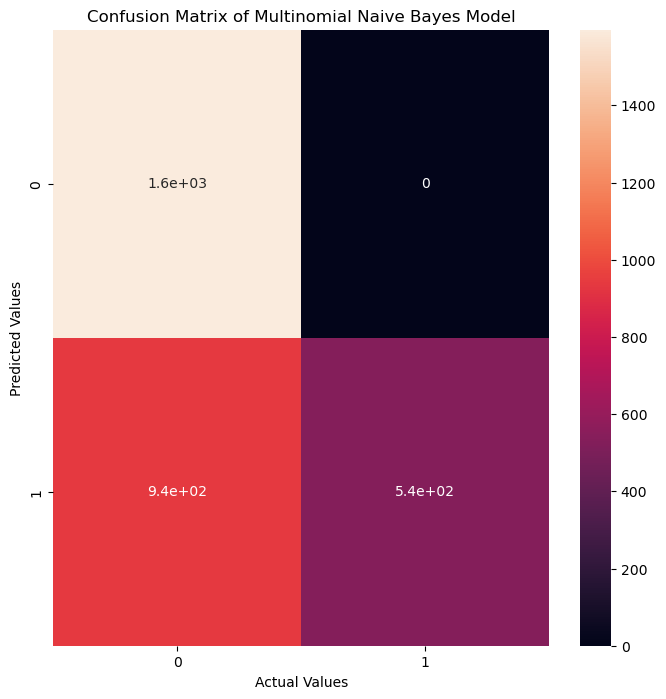

In [41]:
import seaborn as sns
plt.figure(figsize=(8,8))
g = sns.heatmap(data = cm, annot = True)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring = 'f1', cv = 10)
print(round(cv1.mean(),3))
print(round(cv1.std(), 3))

0.937
0.001


In [44]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1596
           1       1.00      0.36      0.53      1476

    accuracy                           0.69      3072
   macro avg       0.81      0.68      0.65      3072
weighted avg       0.81      0.69      0.66      3072



In [46]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[1596,    0],
       [ 177, 1299]], dtype=int64)

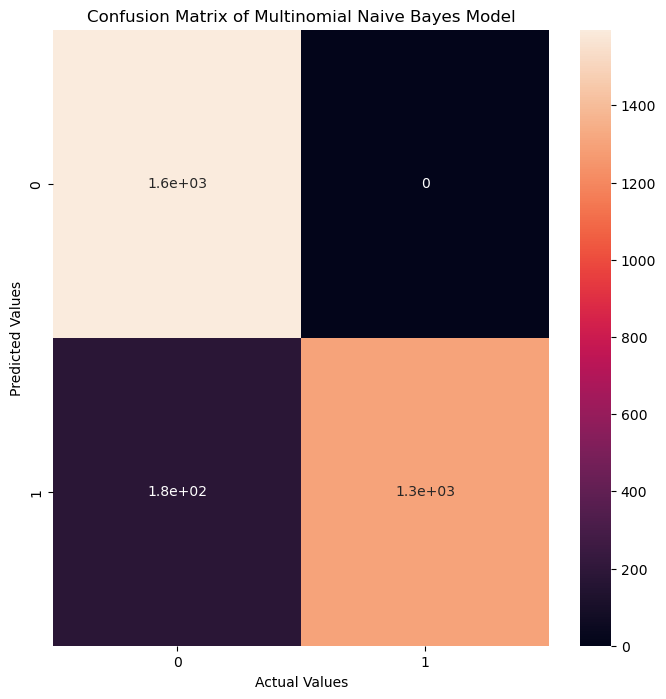

In [48]:
plt.figure(figsize=(8,8))
g = sns.heatmap(data = cm1, annot = True)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual Values')
p = plt.ylabel('Predicted Values')

In [65]:
def predict_spam(sns):
    message = re.sub(pattern = '[^a-zA-Z]', repl='', string=sns) # Filtering out specialcharacters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [66]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to 23,160 in cpmpensation from mis-sold PPI on a credit or loan.'
if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message')
else:
    print('This is a HAM (normal) message')

This is a HAM (normal) message


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [67]:
# Prediction 2 - Casual text message
sample_message = 'Came to think of it. I have got a spam message before'
if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message')
else:
    print('This is a HAM (normal) message')

This is a HAM (normal) message


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
